In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ecotools.pi_client import pi_client

sns.set('paper')
# Option Paramater time_zone
# default timezone is time_zone='America/Los_Angeles' use https://www.iana.org/time-zones 

#pi = pi_client(username= r'ad3\username')
pi = pi_client(username = r'ad3\sbharadw')

In [2]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag1 = pi.search_by_point(['Ghausi_ChilledWater_Demand_kBtu','aiTIT4045' ])

tag1

['Ghausi_ChilledWater_Demand_kBtu', 'aiTIT4045']

In [3]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag1))

df = pi.get_stream_by_point(tag1, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
df.head()

10:56:25: Sending API request... Chunk 1 of 1
10:56:28: Response recieved for 2 tags! (2.86)


,Ghausi_ChilledWater_Demand_kBtu,aiTIT4045
Timestamp,,
2017-03-01 00:00:00,0.0,44.861844
2017-03-01 01:00:00,0.0,42.978464
2017-03-01 02:00:00,0.0,42.432911
2017-03-01 03:00:00,0.0,42.335387
2017-03-01 04:00:00,0.0,42.585000


Text(0, 0.5, 'Demand kBtu')

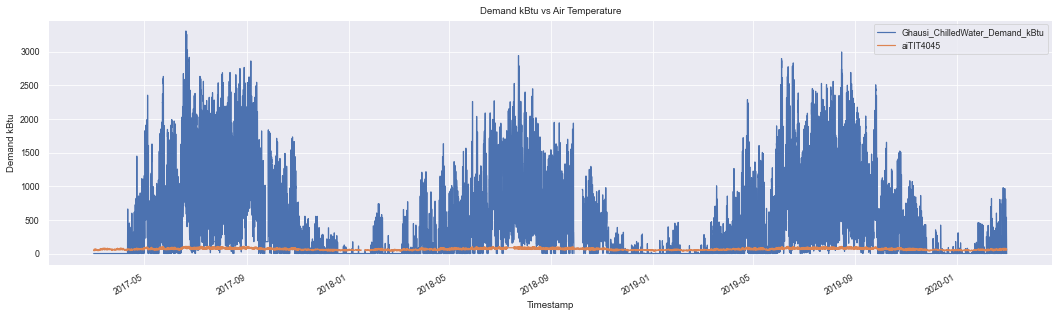

In [4]:
df.plot(figsize=(18,5))
plt.title('Demand kBtu vs Air Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Demand kBtu')

In [107]:
df.dropna(inplace=True)

In [108]:
df.isnull().sum()

Ghausi_ChilledWater_Demand_kBtu    0
aiTIT4045                          0
dtype: int64

# 1. Linear Regression

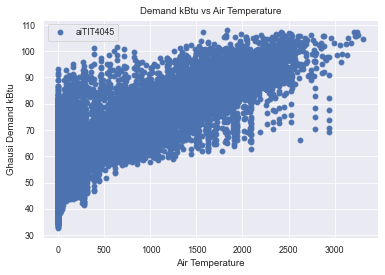

In [109]:
df.plot(x='Ghausi_ChilledWater_Demand_kBtu', y='aiTIT4045', style='o')
plt.title('Demand kBtu vs Air Temperature')
plt.ylabel('Ghausi Demand kBtu')
plt.xlabel('Air Temperature')
plt.show()

In [110]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [111]:
df.dropna(inplace=True)

In [112]:
df.isnull().values.any()

False

In [113]:
# defining feature matrix(X) and response vector(y)
df_y=df['Ghausi_ChilledWater_Demand_kBtu']
df_x=df
del df_x['Ghausi_ChilledWater_Demand_kBtu']

In [114]:
from sklearn.model_selection import train_test_split as tts
train_df_x, test_df_x, train_df_y, test_df_y = tts(df_x, df_y, random_state = 42, test_size=0.2, stratify = None)

In [115]:
print("Shape of train_df_x is",train_df_x.shape )
print("Shape of test_df_x is",test_df_x.shape )
print("Shape of train_df_y is",train_df_y.shape )
print("Shape of test_df_y is",test_df_y.shape )

Shape of train_df_x is (20708, 1)
Shape of test_df_x is (5178, 1)
Shape of train_df_y is (20708,)
Shape of test_df_y is (5178,)


In [116]:
from sklearn.model_selection import train_test_split as tts
train_x, val_x, train_y, val_y = tts(train_df_x, train_df_y, random_state = 42, test_size=0.2, stratify = None)

In [117]:
print("Shape of training set",train_x.shape, train_y.shape)
print("Shape of validation set",val_x.shape, val_y.shape)
print("Shape of test set",test_df_x.shape, test_df_y.shape)

Shape of training set (16566, 1) (16566,)
Shape of validation set (4142, 1) (4142,)
Shape of test set (5178, 1) (5178,)


In [118]:
# create linear regression object
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()

In [119]:
reg.fit(train_x, train_y)

LinearRegression()

In [120]:
y_pred = reg.predict(test_df_x)

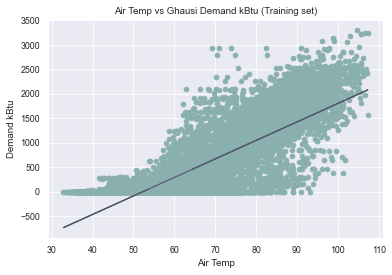

In [121]:
plt.scatter(train_x, train_y, color = "#89b0ae")
plt.plot(train_x, reg.predict(train_x), color = "#555b6e")
plt.title("Air Temp vs Ghausi Demand kBtu (Training set)")
plt.xlabel("Air Temp")
plt.ylabel("Demand kBtu")
plt.show()

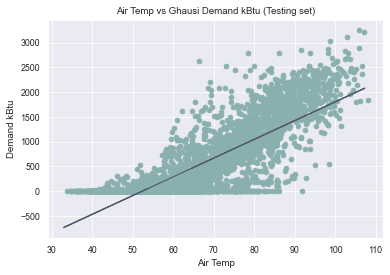

In [122]:
plt.scatter(test_df_x, test_df_y, color = "#89b0ae")
plt.plot(train_x, reg.predict(train_x), color = "#555b6e")
plt.title("Air Temp vs Ghausi Demand kBtu (Testing set)")
plt.xlabel("Air Temp")
plt.ylabel("Demand kBtu")
plt.show()

In [123]:
# variance score or the R-squared value: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(test_df_x, test_df_y)))

Variance score: 0.7075053424727886


In [124]:
# regression coefficients
print('Coefficients:',reg.coef_)
# regression intercept
print('Intercept:' ,reg.intercept_)

Coefficients: [37.80861685]
Intercept: -1978.7540312760168


In [176]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_df_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_df_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_df_y, y_pred)))
print('R Squared Score is:', r2_score(test_df_y, y_pred))
r1 = r2_score(y_test, y_pred)
mse1 = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 599.4481251566497
Mean Squared Error: 717271.3740689291
Root Mean Squared Error: 846.918752932611
R Squared Score is: -0.7095563924383519


In [126]:
# # plot for residual error
 
# ## setting plot style
# plt.style.use('fivethirtyeight')
 
# ## plotting residual errors in training data
# plt.scatter(reg.predict(train_x), reg.predict(train_x) - train_y,
#             color = "#6D545D", s = 10, label = 'Train data')
 
# ## plotting residual errors in test data
# plt.scatter(reg.predict(test_df_x), reg.predict(test_df_x) - test_df_y,
#             color = "#73BA9B", s = 10, label = 'Test data')
 
# ## plotting line for zero residual error
# plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
# ## plotting legend
# plt.legend(loc = 'upper right')
 
# ## plot title
# plt.title("Residual errors")

# plt.xlabel("Predictor values")
# plt.ylabel("Residuals")

 
# ## function to show plot
# plt.show()

# 2. Decision Trees

In [127]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag1 = pi.search_by_point(['Ghausi_ChilledWater_Demand_kBtu','aiTIT4045' ])

tag1

['Ghausi_ChilledWater_Demand_kBtu', 'aiTIT4045']

# EDA

In [128]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag1))

df2 = pi.get_stream_by_point(tag1, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
df2.head()

02:39:02: Sending API request... Chunk 1 of 1
02:39:05: Response recieved for 2 tags! (3.2)


,Ghausi_ChilledWater_Demand_kBtu,aiTIT4045
Timestamp,,
2017-03-01 00:00:00,0.0,44.861844
2017-03-01 01:00:00,0.0,42.978464
2017-03-01 02:00:00,0.0,42.432911
2017-03-01 03:00:00,0.0,42.335387
2017-03-01 04:00:00,0.0,42.585000


# Clean

In [129]:
df2.dropna(inplace=True)

In [130]:
df2.isnull().values.any()

False

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

# Split

In [132]:
y = df2.Ghausi_ChilledWater_Demand_kBtu
x = df2.aiTIT4045
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [133]:
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
rt

DecisionTreeRegressor(max_depth=5)

In [134]:
model_r = rt.fit(x_train, y_train)

In [135]:
y_pred = model_r.predict(x_test)
y_pred

array([474.34518258, 170.98205912, 286.45955529, ..., 474.34518258,
         9.25451844, 286.45955529])

# Compare Metrics

In [136]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse2 = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 168.40352284309563
Mean Squared Error: 91058.98243661447
Root Mean Squared Error: 301.7598091804382
R Squared Score is: 0.7829685232935476


In [137]:
for importance, name in sorted(zip(rt.feature_importances_,
                                   x_train),reverse=True):
    print(name, importance)

[62.41132467] 1.0


In [138]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(x, y)


DecisionTreeRegressor(random_state=0)

# Model

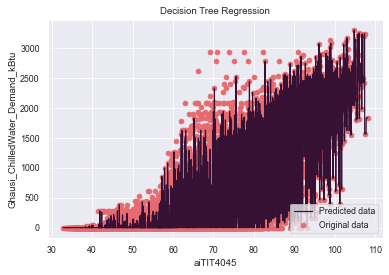

In [139]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(x), max(x), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(x, y, color = '#E56B70', label = 'Original data')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),color = '#361134', label = 'Predicted data')


# specify title
plt.title('Decision Tree Regression')

# specify X axis label
plt.ylabel('Ghausi_ChilledWater_Demand_kBtu')

# specify Y axis label
plt.xlabel('aiTIT4045')

plt.legend(loc = 'lower right')

# show the plot
plt.show()


In [140]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Decision Tree'])

# 3. Random Forest

In [141]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag3 = pi.search_by_point(['Ghausi_ChilledWater_Demand_kBtu','aiTIT4045' ])

tag3

['Ghausi_ChilledWater_Demand_kBtu', 'aiTIT4045']

In [142]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag3))

features = pi.get_stream_by_point(tag3, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
features.head()

02:40:56: Sending API request... Chunk 1 of 1
02:40:59: Response recieved for 2 tags! (2.68)


,Ghausi_ChilledWater_Demand_kBtu,aiTIT4045
Timestamp,,
2017-03-01 00:00:00,0.0,44.861844
2017-03-01 01:00:00,0.0,42.978464
2017-03-01 02:00:00,0.0,42.432911
2017-03-01 03:00:00,0.0,42.335387
2017-03-01 04:00:00,0.0,42.585000


In [143]:
features.dropna(inplace=True)

In [144]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Ghausi_ChilledWater_Demand_kBtu']) #y
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Ghausi_ChilledWater_Demand_kBtu', axis = 1) #x
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Split

In [145]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [146]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (19414, 1)
Training Labels Shape: (19414,)
Testing Features Shape: (6472, 1)
Testing Labels Shape: (6472,)


In [147]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('aiTIT4045')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  440.4


# Model

In [148]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Metrics

In [149]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 206.53


In [150]:
y_pred = rf.predict(test_features)

In [151]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
print('R Squared Score is:', r2_score(test_labels, y_pred))
r3 = r2_score(test_labels, y_pred)
mse3 = metrics.mean_squared_error(test_labels, y_pred)

Mean Absolute Error: 206.5314019551227
Mean Squared Error: 131690.14130151525
Root Mean Squared Error: 362.8913629469779
R Squared Score is: 0.6890846651462503


# 4. Neural Networks

In [152]:
print(__doc__)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

Automatically created module for IPython interactive environment


In [153]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag4 = pi.search_by_point(['Ghausi_ChilledWater_Demand_kBtu','aiTIT4045' ])

tag4

['Ghausi_ChilledWater_Demand_kBtu', 'aiTIT4045']

In [154]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag4))

dff = pi.get_stream_by_point(tag4, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
dff.head()

02:41:28: Sending API request... Chunk 1 of 1
02:41:31: Response recieved for 2 tags! (2.78)


,Ghausi_ChilledWater_Demand_kBtu,aiTIT4045
Timestamp,,
2017-03-01 00:00:00,0.0,44.861844
2017-03-01 01:00:00,0.0,42.978464
2017-03-01 02:00:00,0.0,42.432911
2017-03-01 03:00:00,0.0,42.335387
2017-03-01 04:00:00,0.0,42.585000


# Clean

In [155]:
dff.dropna(inplace=True)

In [156]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

# Split

In [157]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y = np.array(dff['Ghausi_ChilledWater_Demand_kBtu'])
# Remove the labels from the features
# axis 1 refers to the columns
X = dff.drop('Ghausi_ChilledWater_Demand_kBtu', axis = 1)
# Saving feature names for later use
feature_list = list(dff.columns)
# Convert to numpy array
dff = np.array(dff)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [158]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

# Model

In [159]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

# Metrics

In [160]:
y_pred=reg.predict(X_testscaled)

In [161]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))
r4 = r2_score(y_test, y_pred)
mse4 = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 169.77371211654733
Mean Squared Error: 93370.09835786565
Root Mean Squared Error: 305.5652113017214
R Squared Score is: 0.7708383122897412


# Struggled with creating visuals for Random Forest and Neural Networks

In [162]:
#r2 and mse plots of each function bar plots higher r^2 is better 
#lower mse is better like 0
#which method is best

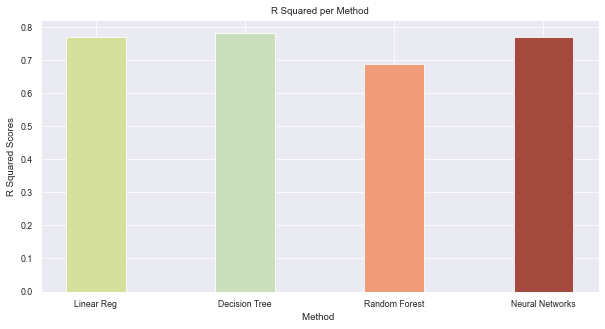

In [175]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Linear Reg':r1, 'Decision Tree':r2, 'Random Forest':r3,
		'Neural Networks':r4}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color =['#d4e09b','#cbdfbd', '#f19c79', '#a44a3f'],
		width = 0.4)

plt.xlabel("Method ")
plt.ylabel("R Squared Scores")
plt.title("R Squared per Method")
plt.show()


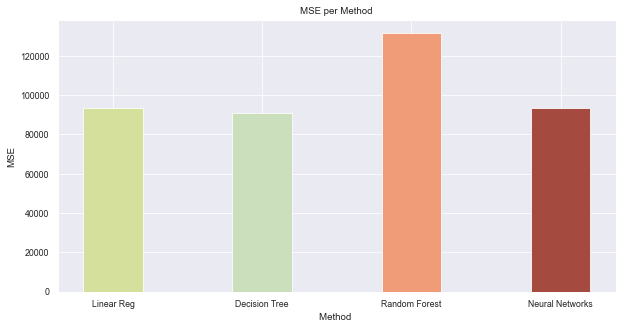

In [178]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Linear Reg':mse1, 'Decision Tree':mse2, 'Random Forest':mse3,
		'Neural Networks':mse4}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color =['#d4e09b','#cbdfbd', '#f19c79', '#a44a3f'],
		width = 0.4)

plt.xlabel("Method ")
plt.ylabel("MSE")
plt.title("MSE per Method")
plt.show()


# Decision Tree is best method since its R^2 score is the highest and it's best for MSE since it has the lowest MSE

In [1]:
import sys 
sys.path

['/Users/sanab/Desktop/eco-tools/Projects',
 '/Users/sanab/opt/anaconda3/lib/python38.zip',
 '/Users/sanab/opt/anaconda3/lib/python3.8',
 '/Users/sanab/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/sanab/.local/lib/python3.8/site-packages',
 '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages',
 '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/sanab/.ipython']